# **Análisis de resultados y determinación de tiempos de máximos**

Análisis de los imagenes recolectadas por Marie Renee**, los cuales representan la observacion de KzHya, en la observación se lograron medir tres tiempos de máximo, a continuación se determinarán:

** Maria Rennee: https://github.com/mariareneemf

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings as wn
from sympy import *
#machine librerias
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, GridSearchCV


### Selección de los datos a tratar:

In [57]:
data = pd.read_csv('kzhya_Measurements.csv')

x = data.iloc[:, 7:8].values
T1 = data.iloc[:, 30:31].values
c2 = data.iloc[:, 45:46].values

n = len(x)

tc1 = (-2.5)*np.log(T1/c2)

x = x - 2458570
y = tc1

data = pd.DataFrame(y)
data.to_excel('flujokzhya.xls', sheet_name='datos_y')

x1 = x[332:452]
y1 = y[332:452]
x2 = x[667:752]
y2 = y[667:752]
x3 = x[1050:1155]
y3 = y[1050:1155]


## Determinacion del primer tiempo de máximo

In [58]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 1/3, random_state = 0)

#Data de entrenamiento
poli_reg1 = PolynomialFeatures(degree = 5)
X1_train_poli = poli_reg1.fit_transform(x1_train)
X1_test_poli = poli_reg1.fit_transform(x1_test)
pr1 = linear_model.LinearRegression()
pr1.fit(X1_train_poli, y1_train)
Y1_pred_pr1 = pr1.predict(X1_train_poli)

#Data de prueba
pr21 = linear_model.LinearRegression()
pr21.fit(X1_test_poli, y1_test)
Y1_pred_pr21 = pr21.predict(X1_test_poli)

# ecuacion del polinomio y precison
print("Coeficientes: ",pr1.coef_)
print("Intercepto: ",pr1.intercept_)
coef1 = np.array(pr1.coef_)
inter1 = np.array(pr1.intercept_)


Coeficientes:  [[ 0.00000000e+00 -1.76655948e+09 -8.30937999e+09  1.76142165e+09
  -1.37984367e+08  3.82947878e+06]]
Intercepto:  [8.4078516e+10]


### Primer ajuste polinómico

In [59]:
x1 = Symbol('x')
y1 = Symbol('y')

coef_aux1 = []
for i in coef1:
    coef_aux1 = i

func_Ajus1 = inter1[0] + coef_aux1[1]*x1 + coef_aux1[2]*(x1**2) + coef_aux1[3]*x1**3 + coef_aux1[4]*x1**4 + coef_aux1[5]*x1**5
print("El ajuste es: ", func_Ajus1 )
derivada1 = diff(func_Ajus1, x1, 1)
print("derivada = ", derivada1)
solucion_1 = solve(derivada1, x1)
print("Maximo = ", solucion_1)

print('Precisión del modelo:')
print("R-cuadrada: ", pr1.score(X1_train_poli, y1_train))


El ajuste es:  3829478.77515489*x**5 - 137984367.257548*x**4 + 1761421653.07987*x**3 - 8309379989.66683*x**2 - 1766559479.61853*x + 84078516043.9237
derivada =  19147393.8757744*x**4 - 551937469.030192*x**3 + 5284264959.23962*x**2 - 16618759979.3337*x - 1766559479.61853
Maximo =  [-0.102896253923804, 9.63247264769687, 9.64807322464908 - 0.00368059653686861*I, 9.64807322464908 + 0.00368059653686861*I]
Precisión del modelo:
R-cuadrada:  0.9619563964994582


### Visualización del primer ajuste y el primer conjunto de datos:

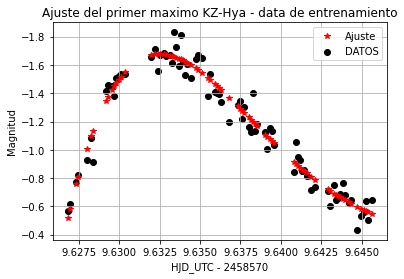

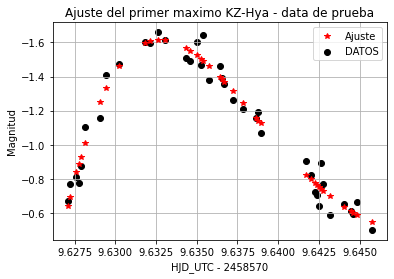

In [90]:
#train
plt.scatter(x1_train, y1_train, color='black', label='DATOS')
plt.plot(x1_train, Y1_pred_pr1, '*', color='red', label="Ajuste")
plt.grid(True)
plt.title("Ajuste del primer maximo KZ-Hya - data de entrenamiento")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()

#test_
plt.scatter(x1_test, y1_test, color='black', label='DATOS')
plt.plot(x1_test, Y1_pred_pr21, '*', color='red', label="Ajuste")
plt.grid(True)
plt.title("Ajuste del primer maximo KZ-Hya - data de prueba")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()


## Determinación del segundo tiempo de máximo:

In [61]:
# Segundo conjunto de datos

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 1/3, random_state = 0)

#Data de entrenamiento
poli_reg2 = PolynomialFeatures(degree = 5)
X2_train_poli = poli_reg2.fit_transform(x2_train)
X2_test_poli = poli_reg2.fit_transform(x2_test)
pr2 = linear_model.LinearRegression()
pr2.fit(X2_train_poli, y2_train)
Y2_pred_pr2 = pr2.predict(X2_train_poli)

#Data de prueba
pr22 = linear_model.LinearRegression()
pr22.fit(X2_test_poli, y2_test)
Y2_pred_pr22 = pr22.predict(X2_test_poli)
# ecuacion del polinomio y presicion
print("Coeficientes: ",pr2.coef_)
print("Intercepto: ",pr2.intercept_)
coef2 = np.array(list(pr2.coef_))
inter2 = np.array(pr2.intercept_)


Coeficientes:  [[ 0.00000000e+00 -7.09157625e+09 -3.38652629e+10  7.13627326e+09
  -5.55891184e+08  1.53420273e+07]]
Intercepto:  [3.45879552e+11]


### Segundo ajuste polinómico:

In [62]:
x2 = Symbol('x')
y2 = Symbol('y')
print(" ")
print("""Segundo Maximo - Modelo de Ajuste""")

coef_aux2 = []
for i in coef2:
    coef_aux2 = i

func_Ajus2 = inter2[0] + coef_aux2[1]*x2 + coef_aux2[2]*(x2**2) + coef_aux2[3]*x2**3 + coef_aux2[4]*x2**4 + coef_aux2[5]*x2**5
print("El ajuste es: ", func_Ajus2 )
derivada2 = diff(func_Ajus2, x2, 1)
print("derivada = ", derivada2)
solucion_2 = solve(derivada2, x2)
print("Maximo = ", solucion_2)

print('Precisión del modelo:')
print("R-cuadrada: ", pr2.score(X2_train_poli, y2_train))    

 
Segundo Maximo - Modelo de Ajuste
El ajuste es:  15342027.2906929*x**5 - 555891183.866165*x**4 + 7136273256.99145*x**3 - 33865262916.9878*x**2 - 7091576249.9818*x + 345879551622.624
derivada =  76710136.4534646*x**4 - 2223564735.46466*x**3 + 21408819770.9743*x**2 - 67730525833.9756*x - 7091576249.9818
Maximo =  [-0.101417326001599, 9.69143222945208, 9.69828403663994 - 0.00475144102968065*I, 9.69828403663994 + 0.00475144102968065*I]
Precisión del modelo:
R-cuadrada:  0.9237468147580313


### Visualización del segundo ajuste y el segundo conjunto de datos:

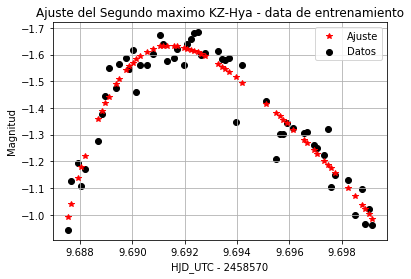

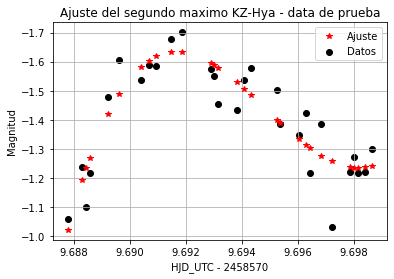

In [91]:
#train
plt.scatter(x2_train, y2_train, color='black', label='Datos')
plt.plot(x2_train, Y2_pred_pr2, '*', color='red', label="Ajuste")
plt.grid(True)
plt.title("Ajuste del Segundo maximo KZ-Hya - data de entrenamiento")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()

#test_
plt.scatter(x2_test, y2_test, color='black', label='Datos')
plt.plot(x2_test, Y2_pred_pr22, '*', color='red', label='Ajuste')
plt.grid(True)
plt.title("Ajuste del segundo maximo KZ-Hya - data de prueba")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()

## Determinación del segundo tiempo de máximo:

In [64]:
# tercer conjunto de datos

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 1/3, random_state = 0)

#Data de entrenamiento
poli_reg3 = PolynomialFeatures(degree = 5)
X3_train_poli = poli_reg3.fit_transform(x3_train)
X3_test_poli = poli_reg3.fit_transform(x3_test)
pr3 = linear_model.LinearRegression()
pr3.fit(X3_train_poli, y3_train)
Y3_pred_pr3 = pr3.predict(X3_train_poli)

#Data de prueba
pr23 = linear_model.LinearRegression()
pr23.fit(X3_test_poli, y3_test)
Y3_pred_pr23 = pr23.predict(X3_test_poli)

# ecuacion del polinomio y presicion
print("Coeficientes: ",pr3.coef_)
print("Intercepto: ",pr3.intercept_)
coef3 = np.array(list(pr3.coef_))
inter3 = np.array(pr3.intercept_)


Coeficientes:  [[ 0.00000000e+00 -3.02338805e+09 -1.44601007e+10  3.02670266e+09
  -2.34217523e+08  6.42178380e+06]]
Intercepto:  [1.49538403e+11]


### Tercer ajuste polinómico:

In [68]:
x3 = Symbol('x')
y3 = Symbol('y')

print(" ")
print("""Tercer Maximo - Modelo de Ajuste""")

coef_aux3 = []
for i in coef3:
    coef_aux3 = i

func_Ajus3 = inter3[0] + coef_aux3[1]*x3 + coef_aux3[2]*(x3**2) + coef_aux3[3]*x3**3 + coef_aux3[4]*x3**4 + coef_aux3[5]*x3**5
print("El ajuste es: ", func_Ajus3 )
derivada3 = diff(func_Ajus3, x3, 1)
print("derivada = ", derivada3)
solucion_3 = solve(derivada3, x3)
print("Maximo = ", solucion_3)

print('Precisión del modelo:')
print("R-cuadrada: ", pr3.score(X3_train_poli, y3_train))    

 
Tercer Maximo - Modelo de Ajuste
El ajuste es:  6421783.7990124*x**5 - 234217522.642847*x**4 + 3026702661.57637*x**3 - 14460100691.7672*x**2 - 3023388052.59832*x + 149538403248.619
derivada =  32108918.995062*x**4 - 936870090.571387*x**3 + 9080107984.72911*x**2 - 28920201383.5343*x - 3023388052.59832
Maximo =  [-0.101287564684347, 9.75119675538810, 9.76398392848113 - 0.003227981905043*I, 9.76398392848113 + 0.003227981905043*I]
Precisión del modelo:
R-cuadrada:  0.9308342307159382


### Visualización del ajuste y el tercer conjunto de datos:

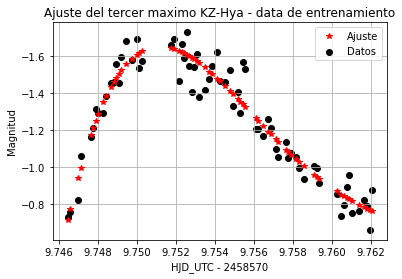

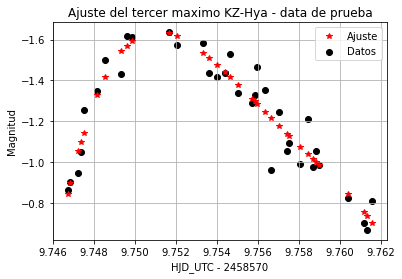

In [92]:
#train
plt.scatter(x3_train, y3_train, color='black', label='Datos')
plt.plot(x3_train, Y3_pred_pr3, '*', color='red', label='Ajuste')
plt.grid(True)
plt.title("Ajuste del tercer maximo KZ-Hya - data de entrenamiento")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()

#test_
plt.scatter(x3_test, y3_test, color='black', label='Datos')
plt.plot(x3_test, Y3_pred_pr23, '*', color='red', label='Ajuste')
plt.grid(True)
plt.title("Ajuste del tercer maximo KZ-Hya - data de prueba")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC - 2458570")
plt.gca().invert_yaxis()
plt.legend(loc=1)
plt.show()

### **Visualización de toda la data (la cual representa la curva de luz obtenida en la observación) con el respectivo ajuste en los tres tiempos de máximo observados.**

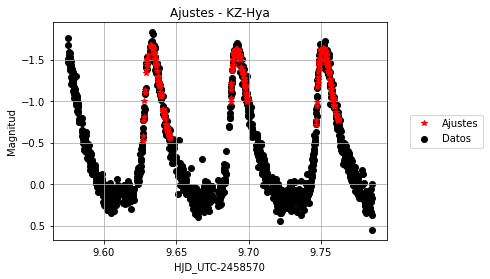

In [93]:
#Grafica final
plt.scatter(x, y, color='black', label='Datos')
plt.plot(x1_train, Y1_pred_pr1, '*', color='red', label="Ajustes")
plt.plot(x2_train, Y2_pred_pr2, '*', color='red')
plt.plot(x3_train, Y3_pred_pr3, '*', color='red')
plt.grid(True)
plt.title("Ajustes - KZ-Hya")
plt.ylabel("Magnitud")
plt.xlabel("HJD_UTC-2458570")
plt.gca().invert_yaxis()
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
#plt.legend(loc=3)
plt.show()

### Por tanto, los tres tiempos de máximo obtenidos en la noche de observación serán:

In [89]:
print("""Posibles máximos: \n""")
print("Primer máximo:", solucion_1[1] + 2458570,"\n")
print("Segundo máximo:", solucion_2[1] + 2458570,"\n")
print("Tercer máximo:", solucion_3[1] + 2458570,"\n")

Posibles máximos: 

Primer máximo: 2458579.63247265 

Segundo máximo: 2458579.69143223 

Tercer máximo: 2458579.75119676 

